In [4]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics
import os
import itertools
import math
import plotly.express as px

%matplotlib inline

/var/folders/_w/f4z7dgpj7ds3kb9z3rbqw3lc0000gn/T/ipykernel_1599/2865969739.py:50: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



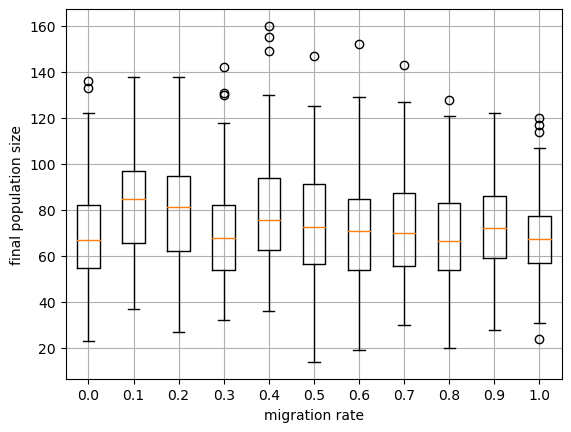

In [5]:
def main():
    # パラメータを変数に代入
    n = 11        # パラメータの数
    seed = 100     # seedの数
    iteration = 50 # 世代数

    x_column = 'go_out_rate'
    y_column = 'population_size'

    # データの読み込み
    params = pd.read_csv('results/parameters.csv', index_col=0)
    x_data = params[x_column]
    y_data_list = []

    # 各シミュレーションの最終個体数を取ってくる
    for j in range(1, n+1):
        y_data = []

        for i in range(1, seed+1):
            df = pd.read_csv(f'results/result{i}/episode_{j}.csv')
            x = df[y_column][iteration]
            y_data.append(x)

        y_data_list.append(y_data)

    # plotly描画用
    df_list = []
    for i in range(n):
        data = pd.DataFrame({
            y_column: pd.Series(y_data_list[i]),
            x_column: pd.Series([x_data[i+1]]*seed),
            'random_seed': pd.Series(range(1, seed+1))
        })
        df_list.append(data)

    df_all = pd.concat(df_list, axis=0, ignore_index=True)
    

    # 図1
    # pyplotで描写
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(y_data_list)
    ax.set_xticklabels(x_data)
    ax.set_xlabel('migration rate')
    ax.set_ylabel('final population size')
    ax.grid(True)
    fig.savefig('tmp1.png', dpi=600)

    fig.show()


    # 図2
    # plotlyで描写
    fig = px.box(df_all, y=y_column, x=x_column)

    fig.show()


if __name__ == '__main__':
    main()

/var/folders/_w/f4z7dgpj7ds3kb9z3rbqw3lc0000gn/T/ipykernel_1599/2759633152.py:50: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



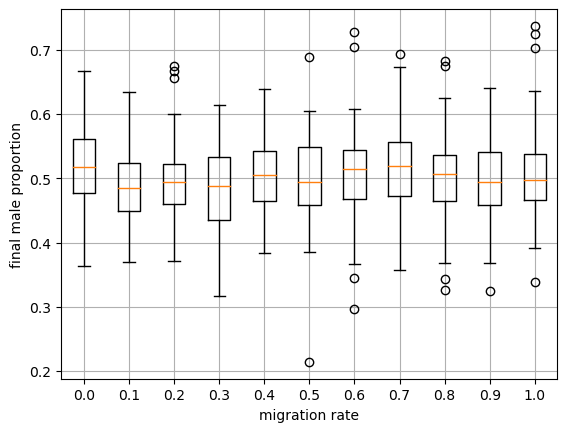

In [6]:
def main():
    # パラメータを変数に代入
    n = 11        # パラメータの数
    seed = 100     # seedの数
    iteration = 50 # 世代数

    x_column = 'go_out_rate'
    y_column = 'male_proportion'

    # データの読み込み
    params = pd.read_csv('results/parameters.csv', index_col=0)
    x_data = params[x_column]
    y_data_list = []

    # 各シミュレーションの最終個体数を取ってくる
    for j in range(1, n+1):
        y_data = []

        for i in range(1, seed+1):
            df = pd.read_csv(f'results/result{i}/episode_{j}.csv')
            x = df[y_column][iteration]
            y_data.append(x)

        y_data_list.append(y_data)

    # plotly描画用
    df_list = []
    for i in range(n):
        data = pd.DataFrame({
            y_column: pd.Series(y_data_list[i]),
            x_column: pd.Series([x_data[i+1]]*seed),
            'random_seed': pd.Series(range(1, seed+1))
        })
        df_list.append(data)

    df_all = pd.concat(df_list, axis=0, ignore_index=True)
    

    # 図1
    # pyplotで描写
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(y_data_list)
    ax.set_xticklabels(x_data)
    ax.set_xlabel('migration rate')
    ax.set_ylabel('final male proportion')
    ax.grid(True)
    fig.savefig('tmp2.png', dpi=600)

    fig.show()


    # 図2
    # plotlyで描写
    fig = px.box(df_all, y=y_column, x=x_column)

    fig.show()


if __name__ == '__main__':
    main()